# Data Glacier Internship
# Week 8
# Pattern Pros
# Data Understanding


In [ ]:
import numpy as np
import pandas as pd
import os

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# read in data
df_bank = pd.read_csv('bank.csv', delimiter=";")
df_bank_full = pd.read_csv('bank-full.csv', delimiter=";")

In [ ]:
print("Summary for bank.csv")
num_cols = len(df_bank.columns)
print("Columns:",num_cols)
num_rows = len(df_bank)
print("Rows: ", num_rows)
size = os.path.getsize('bank.csv')
print("File size: ", size, "Bytes")

Summary for bank.csv
Columns: 17
Rows:  4521
File size:  461474 Bytes


In [ ]:
df_bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [ ]:
df_bank.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [ ]:
print("Summary for bank-full.csv")
num_cols = len(df_bank_full.columns)
print("Columns:",num_cols)
num_rows = len(df_bank_full)
print("Rows: ", num_rows)
size = os.path.getsize('bank-full.csv')
print("File size: ", size, "Bytes")

Summary for bank-full.csv
Columns: 17
Rows:  45211
File size:  4610348 Bytes


In [ ]:
df_bank_full.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [ ]:
df_bank_full.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [ ]:
df_bank_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [ ]:
# reading the file in with Modin
!pip install modin
import modin.pandas as m_pd
from distributed import Client
client=Client()
os.environ["MODIN_ENGINE"] = "dask"  # Modin will use Dask

m_df = m_pd.read_csv('bank-full.csv',delimiter=";")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 957 kB 14.4 MB/s 
     |████████████████████████████████| 956 kB 57.9 MB/s 
     |████████████████████████████████| 956 kB 50.5 MB/s 
     |████████████████████████████████| 761 kB 60.8 MB/s 


In [ ]:
# file read with Modin / Dask
m_df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [ ]:
df_bank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


In [ ]:
sub_df_bank = df_bank.loc[: , (df_bank == 'unknown').any()]
print(sub_df_bank)

                job  education   contact poutcome
0        unemployed    primary  cellular  unknown
1          services  secondary  cellular  failure
2        management   tertiary  cellular  failure
3        management   tertiary   unknown  unknown
4       blue-collar  secondary   unknown  unknown
...             ...        ...       ...      ...
4516       services  secondary  cellular  unknown
4517  self-employed   tertiary   unknown  unknown
4518     technician  secondary  cellular  unknown
4519    blue-collar  secondary  cellular    other
4520   entrepreneur   tertiary  cellular    other

[4521 rows x 4 columns]


In [ ]:
col_contains_unknown=["job","education","contact","poutcome"]
for i in col_contains_unknown:
  new_df_bank = df_bank[df_bank[i].str.contains("unknown") == False]
new_df_bank  

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
5,35,management,single,tertiary,no,747,no,no,cellular,23,feb,141,2,176,3,failure,no
6,36,self-employed,married,tertiary,no,307,yes,no,cellular,14,may,341,1,330,2,other,no
9,43,services,married,primary,no,-88,yes,yes,cellular,17,apr,313,1,147,2,failure,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4492,32,technician,single,secondary,no,309,yes,yes,cellular,16,apr,346,1,234,3,failure,no
4504,42,blue-collar,single,secondary,no,1080,yes,yes,cellular,13,may,951,3,370,4,failure,yes
4514,38,blue-collar,married,secondary,no,1205,yes,no,cellular,20,apr,45,4,153,1,failure,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


In [ ]:
# check for missing values
new_df_bank.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [ ]:
df_bank_full

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [ ]:
sub_df_bank_full = df_bank_full.loc[: , (df_bank_full == 'unknown').any()]
print(sub_df_bank_full)

                job  education    contact poutcome
0        management   tertiary    unknown  unknown
1        technician  secondary    unknown  unknown
2      entrepreneur  secondary    unknown  unknown
3       blue-collar    unknown    unknown  unknown
4           unknown    unknown    unknown  unknown
...             ...        ...        ...      ...
45206    technician   tertiary   cellular  unknown
45207       retired    primary   cellular  unknown
45208       retired  secondary   cellular  success
45209   blue-collar  secondary  telephone  unknown
45210  entrepreneur  secondary   cellular    other

[45211 rows x 4 columns]


In [ ]:
col_contains_unknown=["job","education","contact","poutcome"]
for i in col_contains_unknown:
  new_df_bank_full = df_bank_full[df_bank_full[i].str.contains("unknown") == False]
new_df_bank_full 

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
24060,33,admin.,married,tertiary,no,882,no,no,telephone,21,oct,39,1,151,3,failure,no
24062,42,admin.,single,secondary,no,-247,yes,yes,telephone,21,oct,519,1,166,1,other,yes
24064,33,services,married,secondary,no,3444,yes,no,telephone,21,oct,144,1,91,4,failure,yes
24072,36,management,married,tertiary,no,2415,yes,no,telephone,22,oct,73,1,86,4,other,no
24077,36,management,married,tertiary,no,0,yes,no,telephone,23,oct,140,1,143,3,failure,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45199,34,blue-collar,single,secondary,no,1475,yes,no,cellular,16,nov,1166,3,530,12,other,no
45201,53,management,married,tertiary,no,583,no,no,cellular,17,nov,226,1,184,4,success,yes
45204,73,retired,married,secondary,no,2850,no,no,cellular,17,nov,300,1,40,8,failure,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes


In [ ]:
new_df_bank_full.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

If we only check for null values, it appears as though there are no missing data. There are many instances of "unknown" values, though.

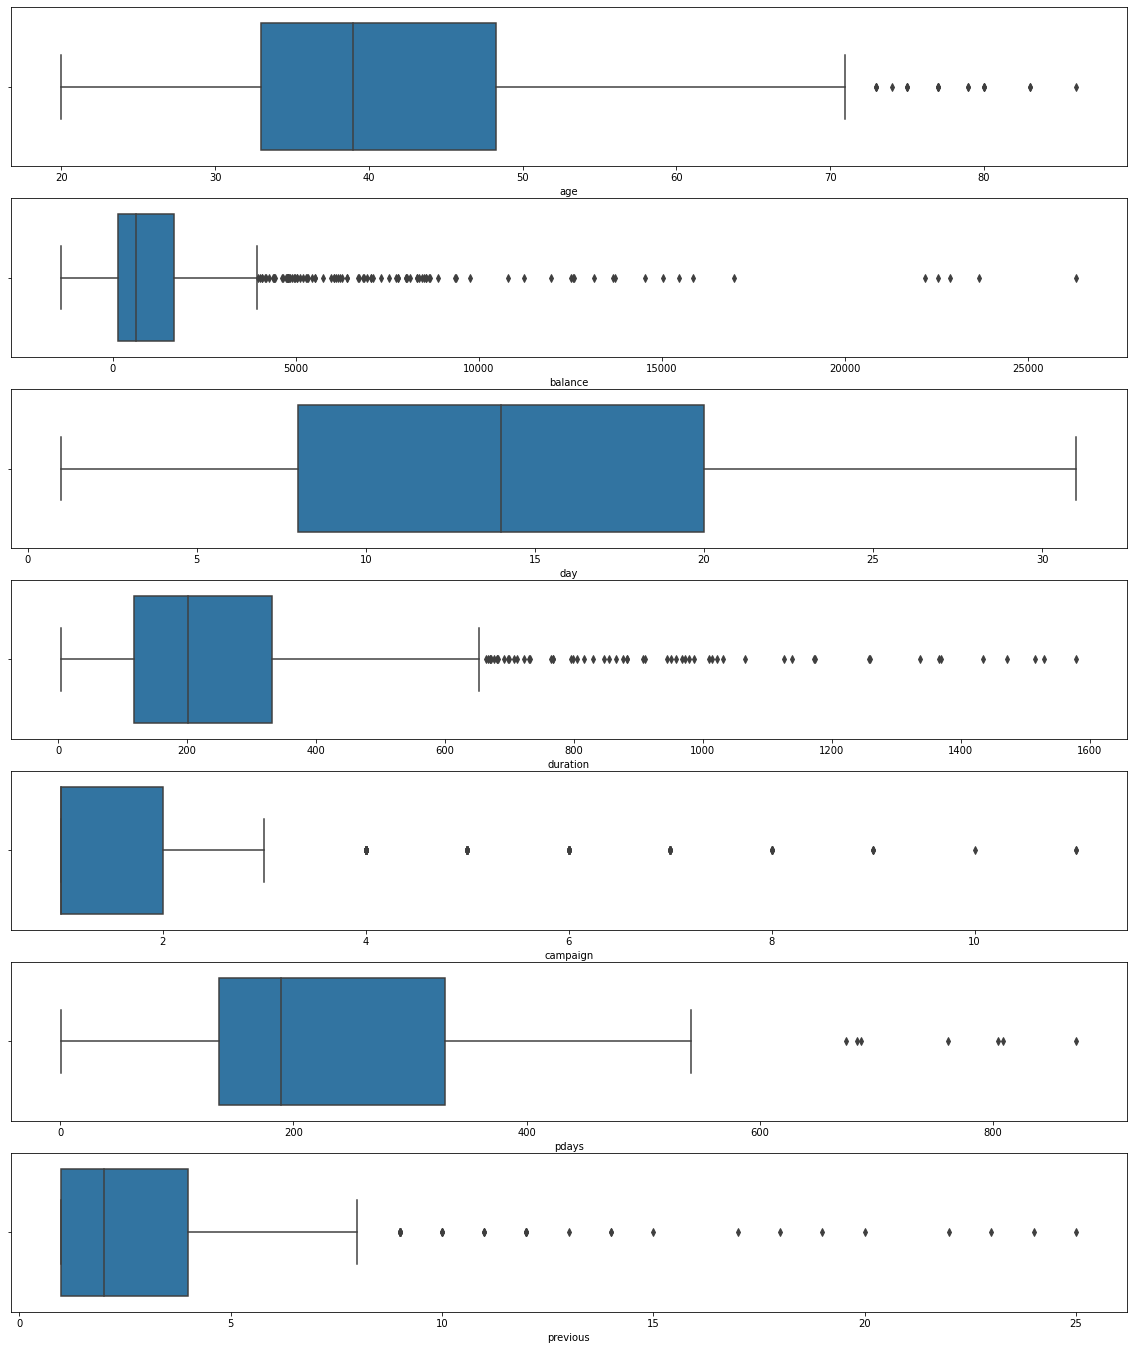

In [ ]:
# outliers
#df_bank.describe()
import matplotlib.pyplot as plt
import seaborn as sns
numeric_columns = ["age",'balance','day','duration','campaign','pdays','previous']
#df_bank.shape
plt.figure(figsize = (20,24))
j=1
for i in numeric_columns:
  plt.subplot(7,1,j)
  sns.boxplot(x=new_df_bank[i])
  j=j+1

In [ ]:
new_df_bank.shape

(816, 17)

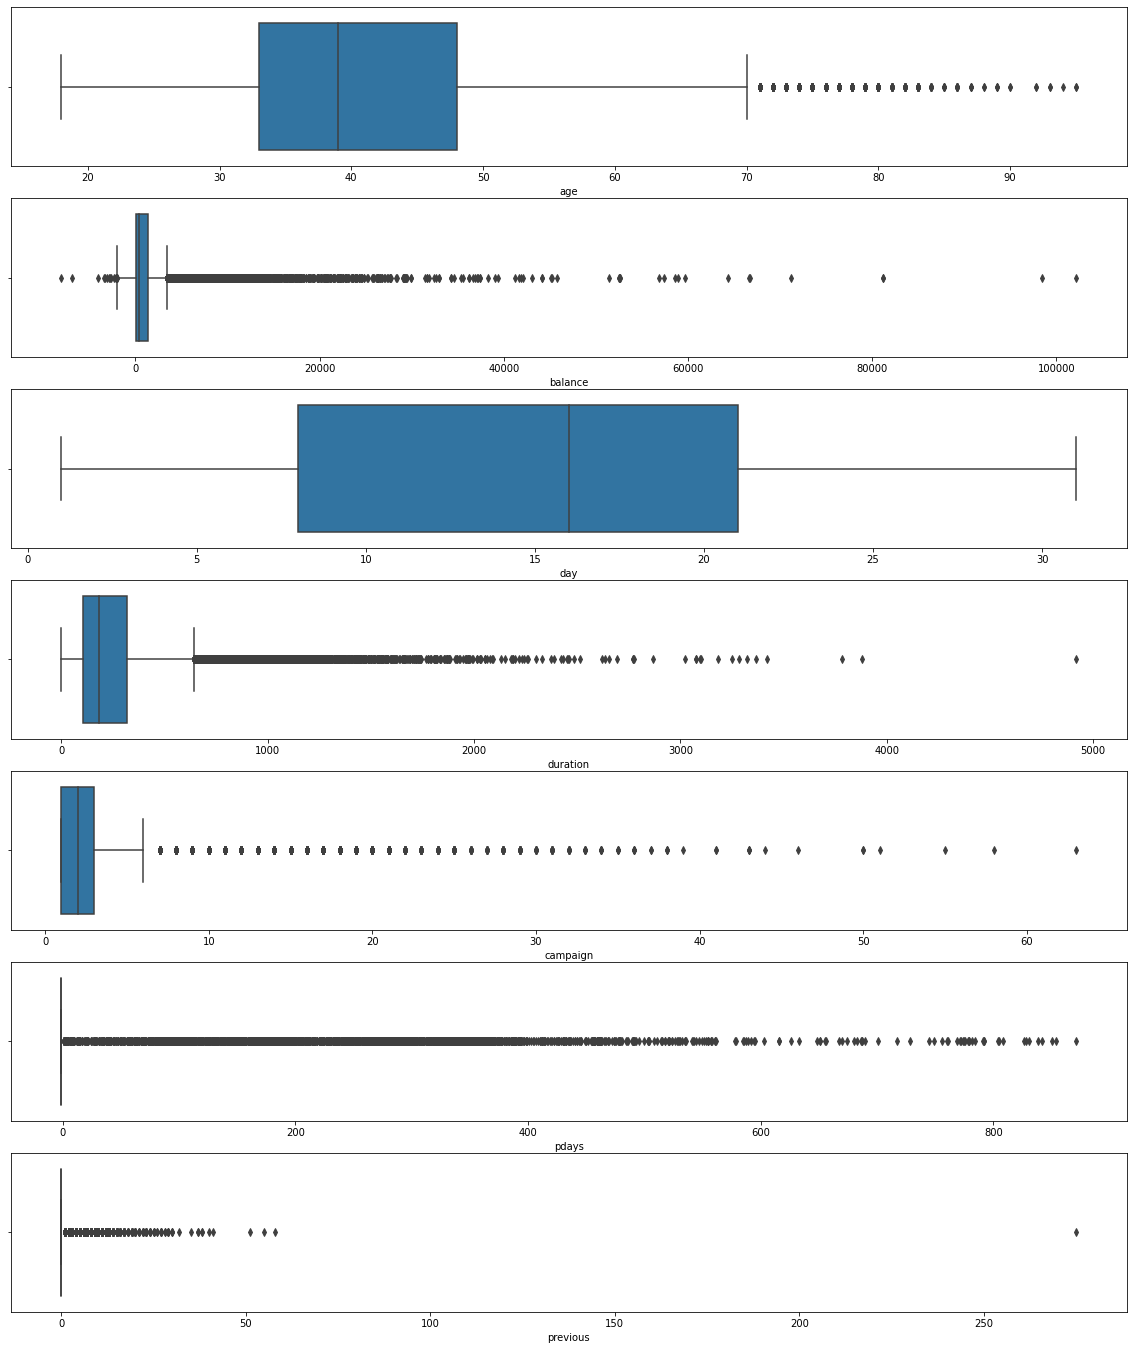

In [ ]:
plt.figure(figsize = (20,24))
j=1
for i in numeric_columns:
  plt.subplot(7,1,j)
  sns.boxplot(x=df_bank_full[i])
  j=j+1

In [ ]:
# skew
df_bank.skew()


age         0.699501
balance     6.596431
day         0.094627
duration    2.772420
campaign    4.743914
pdays       2.717071
previous    5.875259
dtype: float64

In [ ]:
df_bank_full.skew()

age          0.684818
balance      8.360308
day          0.093079
duration     3.144318
campaign     4.898650
pdays        2.615715
previous    41.846454
dtype: float64

balance, duration, campaign, pdays and previous are all positively skewed.
These problems can be omitted by removing outliers, normalizing data, log transformation etc 

In [ ]:
# check for duplicates

df_bank.duplicated().value_counts()


False    4521
dtype: int64

In [ ]:
df_bank_full.duplicated().value_counts()

False    45211
dtype: int64

No duplicates in either dataset 

In [ ]:
#check for NA values/unknown



for column in df_bank_full:
  if 'unknown' in df_bank_full[column].values:
    print(column)



job
education
contact
poutcome


In [ ]:
#four columns that contain unknown values
unknown_columns = ['job', 'education', 'contact', 'poutcome']

In [ ]:
for column in unknown_columns:
  print(df_bank[column].value_counts())

management       969
blue-collar      946
technician       768
admin.           478
services         417
retired          230
self-employed    183
entrepreneur     168
unemployed       128
housemaid        112
student           84
unknown           38
Name: job, dtype: int64
secondary    2306
tertiary     1350
primary       678
unknown       187
Name: education, dtype: int64
cellular     2896
unknown      1324
telephone     301
Name: contact, dtype: int64
unknown    3705
failure     490
other       197
success     129
Name: poutcome, dtype: int64


In [ ]:
for column in unknown_columns:
  print(df_bank_full[column].value_counts())

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64
cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64
unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64


contact and poutcome have a very high amount of unknown values, whereas job and occupation have a very low amount of unknown values.

In [ ]:
# compare full to sample? is it really random?
# difference in skewed coefficients of data suggests it may not be